In [69]:
import madmom as mm
import numpy as np
from madmom.features.beats import RNNBeatProcessor
import madmom
from librosa.core import frames_to_time

In [70]:
filename = 'kleptomanie.wav'
act = RNNBeatProcessor()(filename)

/anaconda/lib/python3.6/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


In [71]:
proc = madmom.features.beats.BeatTrackingProcessor(fps=100)

In [72]:
stuff = proc(act)

In [73]:
intervals = []
for i in range(len(stuff)-1):
    intervals.append(stuff[i+1] - stuff[i])

from collections import Counter
data = Counter(intervals)
qqq = 0
iii = 0
for x in data.most_common():
    qqq += x[0]*x[1]#*x[1]
    iii += x[1]#*x[1]
qqq /= iii
print(60/qqq)

125.018603959


In [74]:
proc1 = RNNBeatProcessor()
probs = proc1(filename)  


/anaconda/lib/python3.6/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


In [75]:
print(max(probs))
bpm = float(round(60/qqq))
print(bpm)

0.939004
125.0


In [76]:
print(len(probs))
for i in range(len(probs)):
    if probs[i] >= max(probs): 
        offset = float(i)/float(100)
print(offset)

13473
109.49


In [77]:
h = offset

while h >= 0:
    print(h)
    if h - 60.0/bpm-0.003 >= 0:
        h = h - 60.0/bpm
    else:
        break
    
h = -h+0.009

109.49
109.00999999999999
108.52999999999999
108.04999999999998
107.56999999999998
107.08999999999997
106.60999999999997
106.12999999999997
105.64999999999996
105.16999999999996
104.68999999999996
104.20999999999995
103.72999999999995
103.24999999999994
102.76999999999994
102.28999999999994
101.80999999999993
101.32999999999993
100.84999999999992
100.36999999999992
99.88999999999992
99.40999999999991
98.92999999999991
98.4499999999999
97.9699999999999
97.4899999999999
97.00999999999989
96.52999999999989
96.04999999999988
95.56999999999988
95.08999999999988
94.60999999999987
94.12999999999987
93.64999999999986
93.16999999999986
92.68999999999986
92.20999999999985
91.72999999999985
91.24999999999984
90.76999999999984
90.28999999999984
89.80999999999983
89.32999999999983
88.84999999999982
88.36999999999982
87.88999999999982
87.40999999999981
86.92999999999981
86.4499999999998
85.9699999999998
85.4899999999998
85.00999999999979
84.52999999999979
84.04999999999978
83.56999999999978
83.08999

In [78]:
print(stuff[0:10])

h = -stuff[1]+0.009

[ 0.04  0.51  0.99  1.44  1.94  2.43  2.93  3.37  3.89  4.36]


/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:11: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.


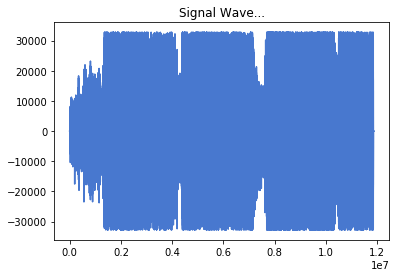

In [79]:
import matplotlib.pyplot as plt
import numpy as np
import wave
import sys


spf = wave.open(filename,'r')

#Extract Raw Audio from Wav File
signal = spf.readframes(-1)
signal = np.fromstring(signal, 'Int16')


#If Stereo
#if spf.getnchannels() == 2:
 #   sys.exit(0)

plt.figure(1)
plt.title('Signal Wave...')
plt.plot(signal)
plt.show()

In [80]:
# We'll need numpy for some mathematical operations
import numpy as np

# matplotlib for displaying the output
import matplotlib.pyplot as plt
import matplotlib.style as ms
ms.use('seaborn-muted')
%matplotlib inline

# and IPython.display for audio output
import IPython.display

# Librosa for audio
import librosa
# And the display module for visualization
import librosa.display

In [81]:
audio_path = filename

y, sr = librosa.load(audio_path)

In [82]:
y_harmonic, y_percussive = librosa.effects.hpss(y)

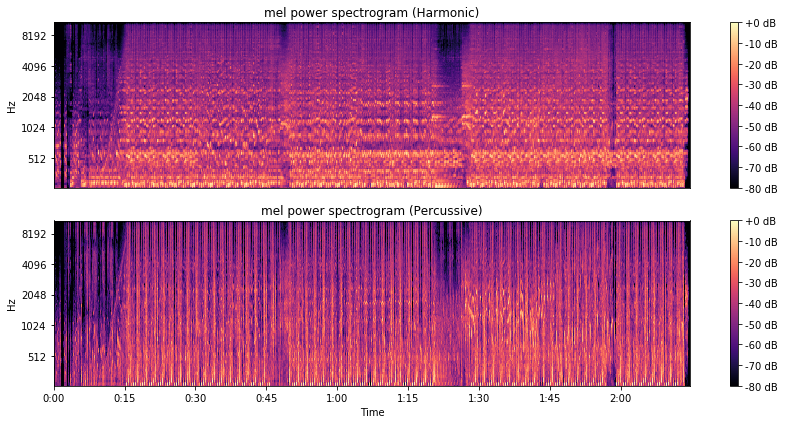

In [83]:
# What do the spectrograms look like?
# Let's make and display a mel-scaled power (energy-squared) spectrogram
S_harmonic   = librosa.feature.melspectrogram(y_harmonic, sr=sr)
S_percussive = librosa.feature.melspectrogram(y_percussive, sr=sr)

# Convert to log scale (dB). We'll use the peak power as reference.
log_Sh = librosa.power_to_db(S_harmonic, ref=np.max)
log_Sp = librosa.power_to_db(S_percussive, ref=np.max)

# Make a new figure
plt.figure(figsize=(12,6))

plt.subplot(2,1,1)
# Display the spectrogram on a mel scale
librosa.display.specshow(log_Sh, sr=sr, y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram (Harmonic)')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

plt.subplot(2,1,2)
librosa.display.specshow(log_Sp, sr=sr, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram (Percussive)')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

(5803, 128)
5803
1016375.75398 -43870.0163125 508187.876991 486252.868835


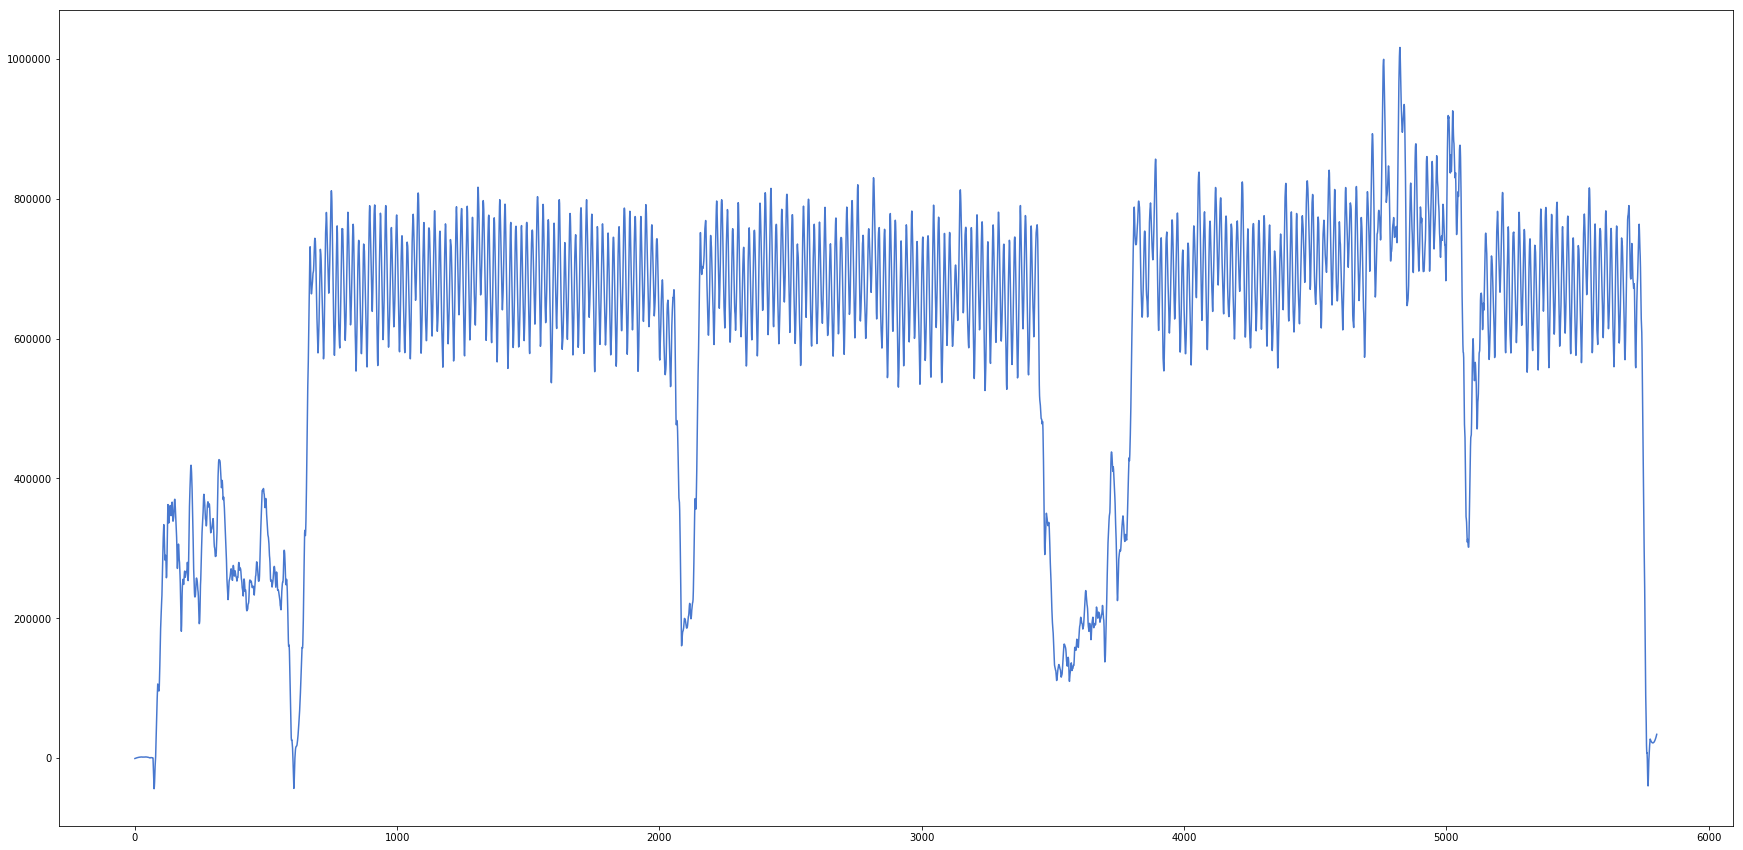

In [84]:
from scipy.signal import savgol_filter

ack = []
pe = log_Sp.transpose()
print(pe.shape)
for i in range(pe.shape[0]):
    ack.append(pe[i][100:])
#print(ack)
sums = []
print(len(ack))
for i in range(len(ack)):
    sums.append(ack[i].sum())
m = min(sums)

for i in range(len(sums)):
    sums[i] -= m
    sums[i] = sums[i]**2
#for i in range(len(sums)):
 #   sums[i] -= sums.sum()/len(sums)

ack2 = savgol_filter(sums, window_length=51, polyorder=2) 
#ack2 = sums

#for i in range(len(sums)):
 #   sums[i] -= m*2
print(max(ack2), min(ack2), max(ack2)/2, (max(ack2)+min(ack2))/2)
import matplotlib.pyplot as plt
plt.figure(figsize=(30,15))
plt.plot(ack2)

plt.show()

In [85]:
beats_count = librosa.frames_to_time(len(ack2))

def time_to_beat(bpm, first_beat, timestamp):
    apprx_beat = (timestamp - first_beat)*(bpm/60.0)*4
    #print(apprx_beat, timestamp)
    return apprx_beat
    

In [86]:
mm_beat_list = []
for mm_beat in stuff:
    mm_beat_list.append(int(round(time_to_beat(bpm, h, mm_beat))))
    print(time_to_beat(bpm, h, mm_beat))


4.50833333333
8.425
12.425
16.175
20.3416666667
24.425
28.5916666667
32.2583333333
36.5916666667
40.5083333333
44.5916666667
48.675
52.675
56.675
60.675
64.675
68.675
72.675
76.675
80.675
84.675
88.675
92.675
96.675
100.675
104.675
108.758333333
112.758333333
116.758333333
120.675
124.591666667
128.591666667
132.591666667
136.591666667
140.591666667
144.591666667
148.591666667
152.591666667
156.591666667
160.591666667
164.591666667
168.591666667
172.591666667
176.591666667
180.591666667
184.591666667
188.591666667
192.591666667
196.591666667
200.591666667
204.591666667
208.591666667
212.591666667
216.591666667
220.591666667
224.591666667
228.591666667
232.591666667
236.591666667
240.591666667
244.591666667
248.591666667
252.591666667
256.591666667
260.591666667
264.591666667
268.591666667
272.591666667
276.591666667
280.591666667
284.591666667
288.591666667
292.591666667
296.591666667
300.591666667
304.591666667
308.591666667
312.591666667
316.591666667
320.591666667
324.591666667
328.

In [87]:
import gf10
import pickle

with open('markov_steps.pkl', 'rb') as fid:
    model = pickle.load(fid)

def make_stream(measure_count, beat):
    line = gf10.generator3000(total = measure_count, tact = beat, text_model = model)
    final_line=gf10.unchainus(line)
    
    stream = final_line.split('\n')[:-1]
    return stream


In [89]:

from statistics import median_low
idea = []
idea8 = []

mean_mel = median_low(ack2)
#mean_mel = (max(ack2) + min(ack2))/3*2
#low_mel = (max(ack2) + min(ack2))/4
print(mean_mel)
stream_flag = 0
stream = []
ass = []
for lvl in range(len(ack2)):
    if ack2[lvl] >= mean_mel and stream_flag == 0:
        stream_flag = 1
        stream.append(lvl)
        ass.append
    elif ack2[lvl] < mean_mel and stream_flag == 1:
        stream_flag = 0
        stream.append(lvl)
        stream = list(frames_to_time(stream[:]))
        #stream.append(16)
        #print(stream)
        idea.append(stream)
        stream = []
'''       
for lvl in range(len(ack2)):
    if ack2[lvl] < mean_mel and ack2[lvl] >= low_mel and stream_flag == 0:
        stream_flag = 1
        stream.append(lvl)
        ass.append
    elif ack2[lvl] < low_mel and stream_flag == 1:
        stream_flag = 0
        stream.append(lvl)
        stream = list(frames_to_time(stream[:]))
        stream.append(8)
        #print(stream)
        idea8.append(stream)
        stream = []
''' 
for k in idea:
    k[0] = round(time_to_beat(bpm, h, k[0]))
    k[1] = round(time_to_beat(bpm, h, k[1]))
    #print(k)
i = 1
while i < len(idea):
    if (idea[i][0]-1 == idea[i-1][1]) or (idea[i][0] == idea[i-1][1]):
        idea[i-1][1] = idea[i][1]
        idea.pop(i)
    else:
        i += 1

for k in idea:
    print(k)
        

665886.983168
[133.0, 138.0]
[140.0, 142.0]
[144.0, 150.0]
[152.0, 154.0]
[156.0, 166.0]
[168.0, 170.0]
[172.0, 174.0]
[176.0, 182.0]
[184.0, 202.0]
[204.0, 206.0]
[208.0, 218.0]
[220.0, 230.0]
[232.0, 234.0]
[236.0, 246.0]
[248.0, 282.0]
[284.0, 286.0]
[289.0, 310.0]
[313.0, 319.0]
[321.0, 322.0]
[324.0, 330.0]
[332.0, 343.0]
[345.0, 346.0]
[348.0, 354.0]
[356.0, 358.0]
[360.0, 390.0]
[393.0, 394.0]
[402.0, 402.0]
[421.0, 426.0]
[428.0, 430.0]
[432.0, 454.0]
[456.0, 478.0]
[480.0, 490.0]
[492.0, 494.0]
[496.0, 502.0]
[504.0, 518.0]
[520.0, 526.0]
[528.0, 542.0]
[544.0, 554.0]
[556.0, 558.0]
[560.0, 566.0]
[569.0, 570.0]
[572.0, 582.0]
[584.0, 586.0]
[588.0, 590.0]
[592.0, 598.0]
[601.0, 602.0]
[604.0, 607.0]
[609.0, 618.0]
[620.0, 622.0]
[625.0, 630.0]
[633.0, 634.0]
[636.0, 638.0]
[640.0, 646.0]
[649.0, 650.0]
[652.0, 654.0]
[656.0, 662.0]
[665.0, 671.0]
[740.0, 762.0]
[764.0, 774.0]
[776.0, 778.0]
[780.0, 782.0]
[784.0, 794.0]
[796.0, 810.0]
[812.0, 814.0]
[816.0, 826.0]
[828.0, 842

In [94]:
import random

track_len = (frames_to_time(len(ack2))-h)/60.0*bpm
#print(frames_to_time(len(ack2))-0.203)
#print(frames_to_time(len(ack2)), track_len)
b = []
stream_flag = 0
stream = []
k = 0
arrows = ['0001', '0010', '0100', '1000', '0000']
for i in range(int(track_len)*4):
    
    for j in range(len(idea)):
        if i == int(idea[j][0]):
            stream_flag = 1
            k = 0
            stream = make_stream(int(idea[j][1]-idea[j][0])+1, 16)
            break
    if stream_flag == 0:
        if ((i in mm_beat_list) or (i%3 == 0)) and (i < track_len-16) :
            b.append(random.choice(arrows))
        else:
            b.append('0000')
    else:
        b.append(stream[k])
        k += 1
    
    for j in range(len(idea)):
        if i == int(idea[j][1]):
            stream_flag = 0
    #print(i, stream_flag)
    if i%16 == 0:
        b.append(',')
print((int(track_len)*4)%16)
for i in range(16-(int(track_len)*4)%16+1):
    b.append('0000')

govno
shit1
ne govno
sooka blya
govno
shit2
govno
shit2
govno
shit3
ne govno
good2
ne govno
sooka blya
govno
shit1
govno
shit2
ne govno
good2
ne govno
good1
ne govno
good2
govno
shit2
ne govno
good1
govno
shit3
govno
shit1
govno
shit2
govno
shit1
ne govno
sooka blya
govno
shit3
ne govno
good2
govno
shit2
ne govno
good2
govno
shit3
ne govno
good2
govno
shit3
ne govno
good2
ne govno
good2
ne govno
sooka blya
govno
shit2
ne govno
good2
ne govno
good2
ne govno
good2
govno
shit2
govno
shit2
govno
shit2
govno
shit1
govno
shit2
ne govno
good2
ne govno
good1
govno
shit3
ne govno
good2
ne govno
good1
govno
shit3
ne govno
good2
ne govno
good1
govno
shit3
ne govno
good2
ne govno
good1
govno
shit2
ne govno
good2
govno
shit3
govno
shit1
ne govno
good1
govno
shit2
ne govno
good2
govno
shit2
ne govno
good2
ne govno
good2
ne govno
good2
ne govno
good2
ne govno
good2
ne govno
good2
govno
shit1
govno
shit1
govno
shit1
govno
shit1
govno
shit2
govno
shit1
ne govno
good2
ne govno
good1
govno
shit2
ne govno

In [95]:
b.pop(0)
b.pop(1)
b.append(',')
string_b = ' '.join(b)
print(string_b)
import re
for i in range(len(b)):
    string_b = re.sub(r', 0000 ,', r', 0000 0000 0000 0000 ,', string_b, count=0)
    string_b = re.sub(r', 0000 0000 ,', r', 0000 0000 0000 0000 ,', string_b, count=0)
    string_b = re.sub(r', 0000 0000 0000 ,', r', 0000 0000 0000 0000 ,', string_b, count=0)
    string_b = re.sub(r', 0000 0000 0000 0000 (0000 )+,', r', 0000 0000 0000 0000 ,', string_b, count=0)
#string_b = re.sub(r', 0000 0000 0000 0000 (0000 )+,', r', 0000 0000 0000 0000 ,', string_b, count=0)
b = string_b.split(' ')
b.pop(0)
b.pop(len(b)-1)
b.append(';')
for s in b:
    print(s)
    

, 0000 0000 0000 0010 1000 0000 0010 0100 0000 0000 0100 0000 0000 0001 0100 , 0000 1000 0000 1000 0000 0000 0000 0001 0000 0000 0100 0000 0010 1000 0000 0010 , 0100 0000 0000 0100 0001 0000 1000 0000 0100 0010 0000 0000 0010 0000 0000 0000 , 1000 0000 0000 0000 1000 0100 0000 0000 0001 0000 0000 1000 1000 0000 0000 0000 , 0010 1000 0000 0000 1000 0000 0000 0100 0001 0000 1000 0000 0010 1000 0000 0000 , 0000 0000 0000 0100 0010 0000 0100 0000 1000 0000 0000 0000 0010 0000 0000 0010 , 0000 0000 0010 0000 0000 0000 0000 0000 0100 0000 0000 0010 0000 0000 0010 0000 , 0100 1000 0000 0000 0010 0000 0000 0000 0010 0000 1000 0000 1000 1000 0000 0000 , 0001 0000 0000 1000 1000 0100 0010 0100 1000 0010 0000 0100 0001 1000 0000 0100 , 0001 1000 0010 0100 0001 1000 0000 0100 0001 1000 0000 0100 0001 1000 0100 0010 , 0100 1000 0001 1000 0001 0010 0000 0001 0010 0100 1000 0100 0001 1000 0000 0001 , 0010 0001 1000 0010 0100 0001 1000 0001 0010 0100 1000 0100 0010 0001 1000 0001 , 0010 0001 0100 0010

In [96]:
print(bpm, h)

125.0 -0.501


In [97]:
def format_num(some_num):
    sm_friendly_num = "{:.6f}".format(some_num)
    return sm_friendly_num

def make_sm_header(title, track_name, offset, bpm, subtitle='', artist='', genre=''):
    header_lines = ['#TITLE:' + title + ';',
                    '#SUBTITLE:' + subtitle + ';',
                    '#ARTIST:' + artist + ';',
                    '#TITLETRANSLIT:;',
                    '#SUBTITLETRANSLIT:;',
                    '#ARTISTTRANSLIT:;',
                    '#GENRE:' + genre + ';',
                    '#CREDIT:AI;',
                    
                    '#BANNER:;',
                    '#BACKGROUND:;',
                    '#LYRICSPATH:;',
                    '#CDTITLE:;',
                    
                    '#MUSIC:' + track_name + ';',
                    '#OFFSET:' + format_num(offset) + ';',
                    
                    '#SAMPLESTART:0.000000;',
                    '#SAMPLELENGTH:15.000000;',
                    '#SELECTABLE:YES;',
                    
                    '#DISPLAYBPM:' + format_num(bpm) + ';',
                    '#BPMS:0.000000=' + format_num(bpm) + ';',
                    '#STOPS:;',

                    '#BGCHANGES:;',
                    '#KEYSOUNDS:;',
                    '#ATTACKS:;',
                    '',
                    '//---------------dance-single - Yaroslav----------------',
                    '#NOTES:',
                    '\tdance-single:',
                    '\tYaroslav:',
                    '\tChallenge:',
                    '\t1488:',
                    '\t0,0,0,0,0:'
                   ]
    return header_lines

hdr = make_sm_header(re.sub(r'.wav', r'', filename, count=0), re.sub(r'.wav', r'.ogg', filename, count=0), h, bpm)
f = open(re.sub(r'.wav', r'.sm', filename, count=0), 'w')
for s in hdr:
    f.write(s + '\n')

for s in b:
    f.write(s+'\n')
f.close()